# Baseline model for breast cancer
In this baseline we will just use FastAIs default tabular trainer without any clairvoyance augmentation.

In [1]:
from fastai.tabular import *
from ranger import *
from annealing import *
from functools import partial

In [2]:
torch.cuda.set_device(0)

In [3]:
path = './data/breast_cancer_a/'
path = Path(path)
df = pd.read_csv(path/'data.csv') # baseline data

In [4]:
' '.join(list(df.columns.values))

'id diagnosis radius_mean texture_mean perimeter_mean area_mean smoothness_mean compactness_mean concavity_mean concave points_mean symmetry_mean fractal_dimension_mean radius_se texture_se perimeter_se area_se smoothness_se compactness_se concavity_se concave points_se symmetry_se fractal_dimension_se radius_worst texture_worst perimeter_worst area_worst smoothness_worst compactness_worst concavity_worst concave points_worst symmetry_worst fractal_dimension_worst Unnamed: 32'

In [5]:
# removing unnammed
df.drop('Unnamed: 32', axis=1, inplace=True)

In [6]:
dep_var = 'diagnosis'
cont_names = list(df.columns.values); cont_names.remove(dep_var)

In [7]:
procs = [FillMissing, Categorify, Normalize]

In [8]:
bs = 8
data = (TabularList.from_df(df, path=path, cont_names=cont_names, procs=procs)
        .split_by_rand_pct(0.1)
        .label_from_df(cols=dep_var)
        .databunch(bs=bs, num_workers=1))

In [9]:
# this will be our baseline
learn = tabular_learner(data, layers=[200,100], metrics=[accuracy]).to_fp16()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


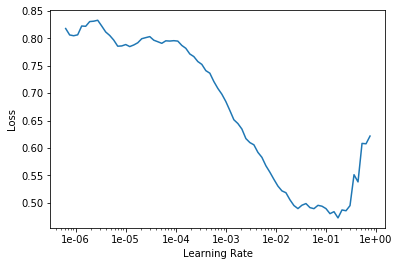

In [11]:
learn.lr_find(); learn.recorder.plot()

In [12]:
# training
lr = 1e-3
learn.fit_one_cycle(5, lr)

epoch,train_loss,valid_loss,accuracy,time
0,0.370721,0.170966,0.964286,00:11
1,0.288181,0.156788,0.982143,00:06
2,0.228068,0.136990,0.982143,00:06
3,0.188582,0.130461,0.964286,00:06
4,0.196967,0.132842,0.964286,00:06


In [19]:
learn.save('baseline')